In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install mglearn
import mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Open JobApplicants.csv file
df = pd.read_csv('JobApplicants.csv')

In [4]:
df.head()

,w,Age,Accessibility,EdLevel,Employment,Gender,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [3]:
df.drop(['MentalHealth'], axis=1, inplace=True)

In [5]:
# Fill missing values with an empty string and split the strings
df['HaveWorkedWith'] = df['HaveWorkedWith'].fillna('').str.split(';')

# Get a set of unique programming languages
unique_languages = set(language for sublist in df['HaveWorkedWith'] if isinstance(sublist, list) for language in sublist)

# Create a new column for each unique language and sets True if the applicant has worked with that language and False if not. Also renames each column to "WW for worked with"
for language in unique_languages:
    df["WW "+language] = df['HaveWorkedWith'].apply(lambda x: 1 if language in x else 0 if isinstance(x, list) else 1)

/var/folders/mr/hbwnrv9d143gy3d9mxdt1m8c0000gn/T/ipykernel_27697/1483703588.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["WW "+language] = df['HaveWorkedWith'].apply(lambda x: 1 if language in x else 0 if isinstance(x, list) else 1)
/var/folders/mr/hbwnrv9d143gy3d9mxdt1m8c0000gn/T/ipykernel_27697/1483703588.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["WW "+language] = df['HaveWorkedWith'].apply(lambda x: 1 if language in x else 0 if isinstance(x, list) else 1)
/var/folders/mr/hbwnrv9d143gy3d9mxdt1m8c0000gn/T

In [6]:
df.head()

,w,Age,Accessibility,EdLevel,Employment,Gender,MainBranch,YearsCode,YearsCodePro,Country,...,WW Kotlin,WW C#,WW Cloud Firestore,WW Express,WW Matlab,WW Elasticsearch,WW Drupal,WW Fastify,WW Angular,WW Redis
0,0,<35,No,Master,1,Man,Dev,7,4,Sweden,...,0,0,0,0,0,0,0,0,0,0
1,1,<35,No,Undergraduate,1,Man,Dev,12,5,Spain,...,0,0,0,1,0,0,0,0,0,0
2,2,<35,No,Master,1,Man,Dev,15,6,Germany,...,0,0,0,0,0,0,0,0,0,0
3,3,<35,No,Undergraduate,1,Man,Dev,9,6,Canada,...,0,0,0,0,0,0,0,0,0,0
4,4,>35,No,PhD,0,Man,NotDev,40,30,Singapore,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Drop the original HaveWorkedWith column
df = df.drop('HaveWorkedWith', axis=1)

In [8]:
#What correlates the most with "employed" column?
df.corr()['Employed'].sort_values()

/var/folders/mr/hbwnrv9d143gy3d9mxdt1m8c0000gn/T/ipykernel_27697/1276420888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Employed'].sort_values()


WW Git           -0.041518
WW Clojure       -0.040896
WW Julia         -0.039680
WW R             -0.032229
WW               -0.031502
                    ...   
WW JavaScript     0.421965
WW TypeScript     0.468950
WW Node.js        0.493086
ComputerSkills    0.585545
Employed          1.000000
Name: Employed, Length: 124, dtype: float64

# Logistic Regression

First we start by getting the necessary libraries to our Logistic Reggesion Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Making a dataset variable to be used in the Logistic Regression
lr = df


In [70]:
# Identify categorical and numerical columns
categorical_cols = ['Age', 'EdLevel', 'Gender', 'MainBranch']
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
#Why was it so weird if I use the under written code???
#numerical_cols.extend(['WW ' + language for language in unique_languages])
#Take WW out of array because it does not contain anything
#numerical_cols.remove('WW ')
#print(numerical_cols)


# Defining the feature matrix X by selecting all columns except Employed 
X = lr[categorical_cols + numerical_cols]  
#X = df.drop(columns=['Employed'])# axis=1 refers to columns
# Defining the target variable y by selecting only the 'Employed' column
y = lr['Employed']

## Data Preprocessing
### Categorigal Variable Enconding

In this part of the code, we create a Pipeline object specifically for preprocessing categorical variables.
Absolutely, I'll walk you through the code step-by-step.

In this part of the code, we create a `Pipeline` object specifically for preprocessing categorical variables. Two main actions are performed here:

1. **Imputation**: We use `SimpleImputer` with the strategy set to `'most_frequent'` which replaces missing values in categorical data with the most common value in each column. 

2. **One-Hot Encoding**: The `OneHotEncoder` is used to convert categorical variables into a form that could be provided to the machine learning algorithm. `FIND LIGE UD AF OM JEG VIL BRUGE DET:` The `handle_unknown='ignore'` option allows the encoder to handle any unseen labels that might appear in the test set that were not present in the training set.

In [71]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert categorical variable into dummy/indicator variables
])

In [72]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Replace missing values with the median
    ('scaler', StandardScaler())
])

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [74]:
# Create the logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'EdLevel', 'Gender',
                                                   'MainBranch'])])),
                ('classifier', LogisticRegression())])

In [77]:
y_pred = pipeline.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10247
           1       0.80      0.80      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039

[[7869 2378]
 [2408 9384]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


vect.fit(df["title"])
feature_names = np.array(vect.get_feature_names_out())
len(feature_names)

# KNN

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knndf = df

In [83]:
# Encode categorical variables
label_encoders = {}
for column in ['Age', 'EdLevel', 'Gender', 'MainBranch']:
    label_encoders[column] = LabelEncoder()
    knndf[column] = label_encoders[column].fit_transform(knndf[column])

In [84]:
# Identify categorical and numerical columns
categorical_cols = ['Age', 'EdLevel', 'Gender', 'MainBranch']
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
#Why was it so weird if I use the under written code???
#numerical_cols.extend(['WW ' + language for language in unique_languages])
#Take WW out of array because it does not contain anything
#numerical_cols.remove('WW ')
#print(numerical_cols)


# Defining the feature matrix X by selecting all columns except Employed 
X = knndf[categorical_cols + numerical_cols]  
#X = df.drop(columns=['Employed'])# axis=1 refers to columns
# Defining the target variable y by selecting only the 'Employed' column
y = knndf['Employed']

In [85]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Create a KNN Regressor model
model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13, 88, 89, 90, 91, 92, 93, 94, 95],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 5 folds for each of 78 candidates, totalling 390 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.3s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.3s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, wei

In [86]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

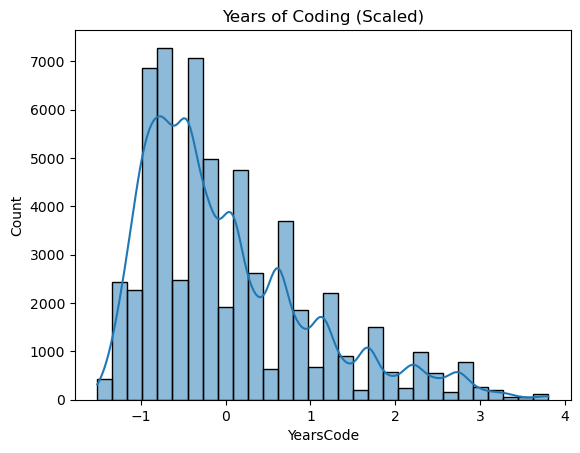

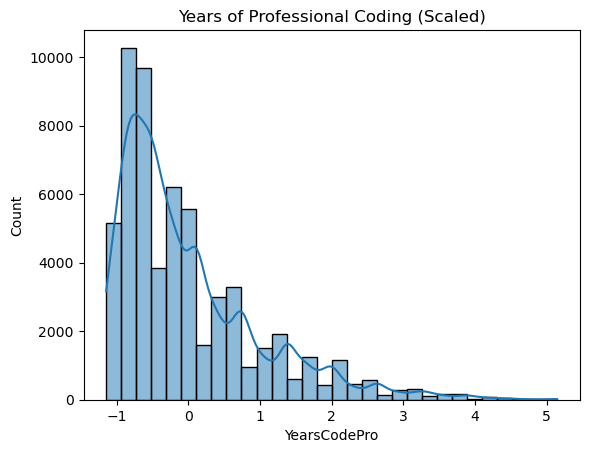

In [94]:
import matplotlib.pyplot as plt



# Assuming 'X_train_scaled' is the scaled feature set

# Convert the scaled array back into a DataFrame
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Visualize the scaled features
sns.histplot(df_scaled['YearsCode'], bins=30, kde=True)
plt.title('Years of Coding (Scaled)')
plt.show()

sns.histplot(df_scaled['YearsCodePro'], bins=30, kde=True)
plt.title('Years of Professional Coding (Scaled)')
plt.show()

In [100]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [101]:
# Predictions
y_pred = knn.predict(X_test_scaled)

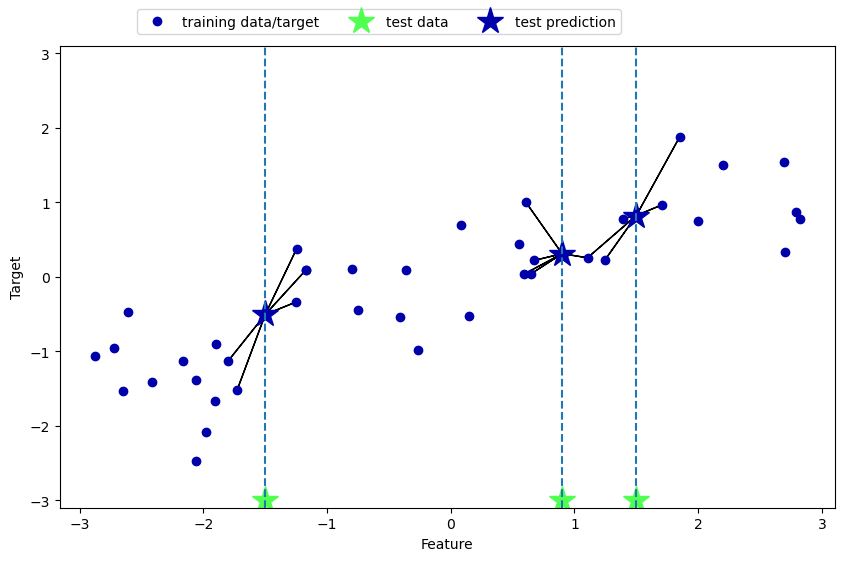

In [102]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

/Users/patrickolsen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


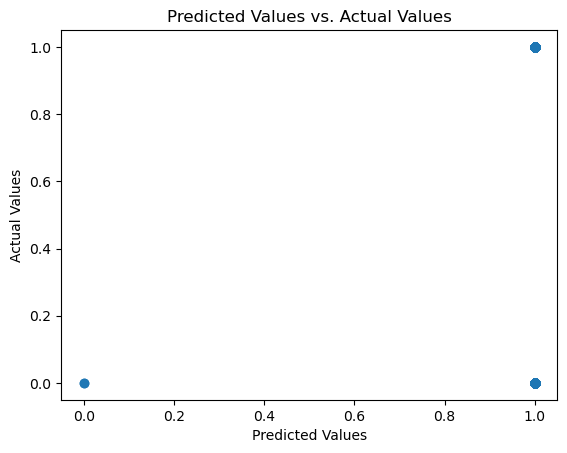

In [103]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = knn.predict(X_test)

# Plot the predicted values versus the actual values
plt.scatter(predictions, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted Values vs. Actual Values')
plt.show()

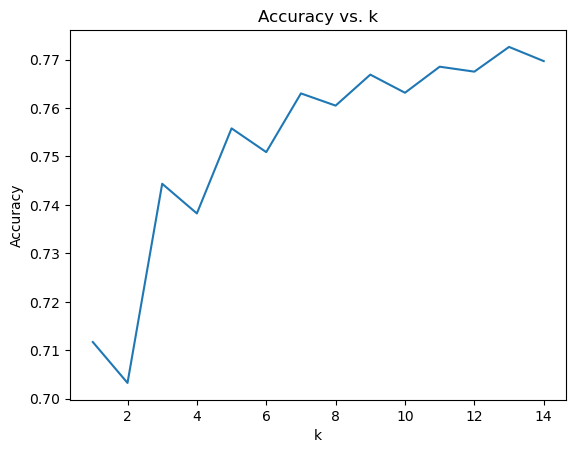

In [92]:
accuracy = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy.append(np.mean(y_pred_k == y_test))

# Plot the results
plt.plot(range(1, 15), accuracy)
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [89]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4964 1862]
 [1726 6141]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      6826
           1       0.77      0.78      0.77      7867

    accuracy                           0.76     14693
   macro avg       0.75      0.75      0.75     14693
weighted avg       0.76      0.76      0.76     14693



# Random forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score 

In [145]:
# Handle Categorical Variables with One-Hot Encoding
rf = pd.get_dummies(df, columns=["Age", "Accessibility", "EdLevel", "Gender", "Country"], drop_first=True)

# Remove non-numeric columns or columns that are not relevant for modeling
# Faktummet at vi fjerner computerskills er også godt da det er en aggregat 
rf = rf.drop(columns=["MainBranch", "ComputerSkills"])

In [146]:
# Assuming "Employed" is the target variable, and the other columns are features
X = rf.drop("Employed", axis=1)  # Features
y = rf["Employed"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model (for classification)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model (for classification, you can use metrics like accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.974205403933846


Er det skidt at vi ikke kun bruger et par kolonner?

In [147]:
#Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(50)

,importance
WW Node.js,0.085687
WW TypeScript,0.073674
WW npm,0.050492
WW MongoDB,0.048798
WW Microsoft SQL Server,0.044163
WW C#,0.042108
WW JavaScript,0.042001
WW jQuery,0.039737
WW SQLite,0.034633
WW Java,0.033993


In [150]:
# Assuming "Employed" is the target variable, and the other columns are features
X = rf.drop("Employed", axis=1)  # Features
y = rf["Employed"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model (for classification)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model (for classification, you can use metrics like accuracy)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.853577748536685
F1 Score: 0.8687197428908506
Precision: 0.8348580811634999
Recall: 0.905444369063772


In [ ]:
#Lookup column previous salary in df where salary <100 and display the full rows
df.loc[df['Salary'] < 100]

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
